Example notebook to demonstrate how to make diagnostic plots using built in methods  

In [1]:
import sys
sys.path.append("../")

import matplotlib.pyplot as plt

from measureEccentricity.measureEccentricity import get_available_methods
from measureEccentricity import measure_eccentricity
from measureEccentricity.load_data import load_waveform

%load_ext autoreload
%autoreload 2

/home1/md.shaikh/miniconda3/envs/eccimrct/lib/python3.8/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/home1/md.shaikh/miniconda3/envs/eccimrct/lib/python3.8/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


In [ ]:
# Let's try a PN eccentric model
# We use the keyword "include_zero_ecc" as we want to use the residual amplitude 
# method that needs data for the zero eccentricity counterpart as well
waveform_keywords = {"approximant": "EccentricTD",
                     "q": 1.0,
                     "chi1": [0.0, 0.0, 0.0],
                     "chi2": [0.0, 0.0, 0.0],
                     "deltaTOverM": 0.1,
                     "Momega0": 0.01,
                     "ecc": 0.1,
                     "mean_ano": 0,
                     "phi_ref": 0,
                     "inclination": 0,
                     "include_zero_ecc": True}
dataDictPN = load_waveform(catalog="LAL", **waveform_keywords)

### Diagnostic plots for Amplitude method

In [ ]:
tref_vec = dataDictPN["t"][dataDictPN["t"] < -300]
tref_vec = tref_vec[tref_vec > -14000]
tref_out, ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(tref_vec, dataDictPN, method="Amplitude", 
                                                                      return_ecc_method=True,
                                                                      extra_kwargs={"debug": False})

Below we plot differenct quantities to asses how well our eccentricity measurment method is working. This could be seen as a diagnostic tool to check an implemented method.

We plot the following quantities
- The eccentricity vs $t^\text{ref}_\text{out}$
- $de/dt$ vs time, this is to test the monotonicity of eccentricity as a function of time
- mean anomaly vs $t^\text{ref}_\text{out}$
- $\omega_{22}$ vs $t^\text{ref}_\text{out}$ with the peaks and troughs shown. This would show if the method is missing any peaks/troughs or selecting one which is not a peak/trough and finally
- $\Delta\phi^{i}_\text{orb}/\Delta\phi^{i-1}_\text{orb}$, where $\Delta\phi^{i}_\text{orb}$ is the change in orbital phase from the previous extrema to the ith extrema. This helps look for missing extrema, as there will be a drastic (roughly factor of 2) change in $\Delta\phi^{i}_\text{orb}$ if there is a missing extrema, and the ratio will go from ~1 to ~2.

Additionally, if `zeroecc` data is provided then we also plot
- $\Delta A_{22} = A_{22}(e) - A_{22}(e=0)$, the residual amplitude as function of time
- $\Delta \omega_{22} = \omega_{22}(e) - \omega_{22}(e=0)$, the residual omega as function of time

These two residual plots might be useful to plot even for method that don't use residual amplitude/frequency since these plots are good diagnostic tools to detect if anything is wrong
with, for example, the waveform data (like frequency near merger) that could lead to glitchy/non monotonic behaviour in the measured eccentricity.

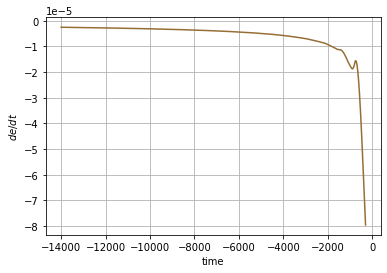

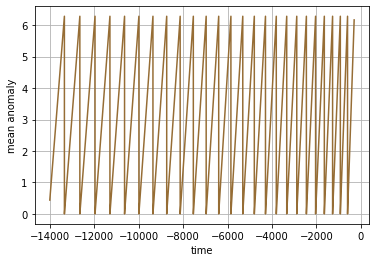

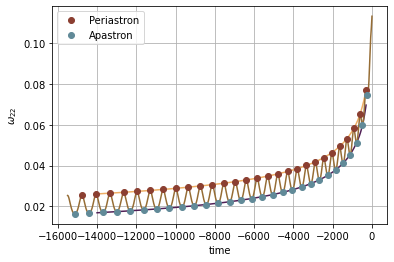

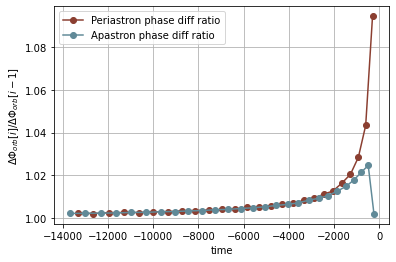

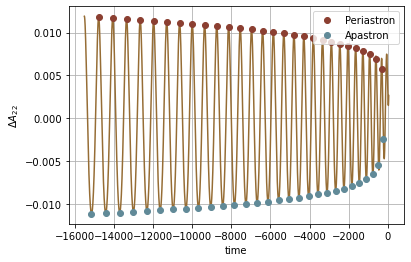

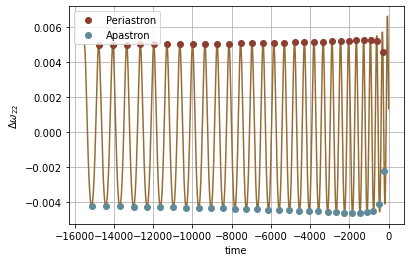

In [4]:
eccMethod.plot_measured_ecc()
eccMethod.plot_decc_dt()
eccMethod.plot_mean_ano()
eccMethod.plot_extrema_in_omega()
eccMethod.plot_phase_diff_ratio_between_peaks()
# if zeroecc data is provided then following diagnostic plots are also available
eccMethod.plot_residual_amp()
eccMethod.plot_residual_omega()

we can club these together as we wish in fig by providing an axis to plot

<AxesSubplot:xlabel='time', ylabel='$\\Delta\\omega_{22}$'>

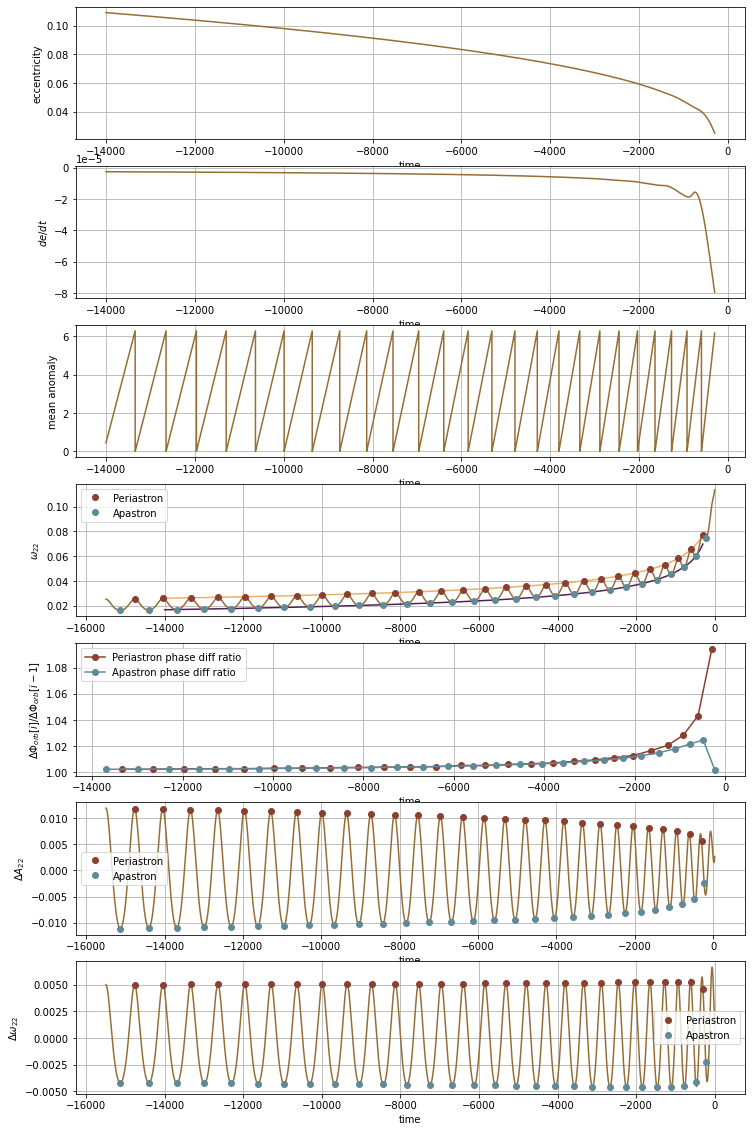

In [5]:
fig, ax = plt.subplots(nrows=7, figsize=(12, 20))
eccMethod.plot_measured_ecc(fig=fig, ax=ax[0])
eccMethod.plot_decc_dt(fig=fig, ax=ax[1])
eccMethod.plot_mean_ano(fig=fig, ax=ax[2])
eccMethod.plot_extrema_in_omega(fig=fig, ax=ax[3])
eccMethod.plot_phase_diff_ratio_between_peaks(fig=fig, ax=ax[4])
eccMethod.plot_residual_amp(fig=fig, ax=ax[5])
eccMethod.plot_residual_omega(fig=fig, ax=ax[6])

Or one can just use the in built make_diagnostic_plots to get all of these at once

(<Figure size 864x2016 with 7 Axes>,
 array([<AxesSubplot:xlabel='time', ylabel='eccentricity'>,
        <AxesSubplot:xlabel='time', ylabel='$de/dt$'>,
        <AxesSubplot:xlabel='time', ylabel='mean anomaly'>,
        <AxesSubplot:xlabel='time', ylabel='$\\omega_{22}$'>,
        <AxesSubplot:xlabel='time', ylabel='$\\Delta \\Phi_{orb}[i] / \\Delta \\Phi_{orb}[i-1]$'>,
        <AxesSubplot:xlabel='time', ylabel='$\\Delta\\omega_{22}$'>,
        <AxesSubplot:xlabel='time', ylabel='$\\Delta A_{22}$'>],
       dtype=object))

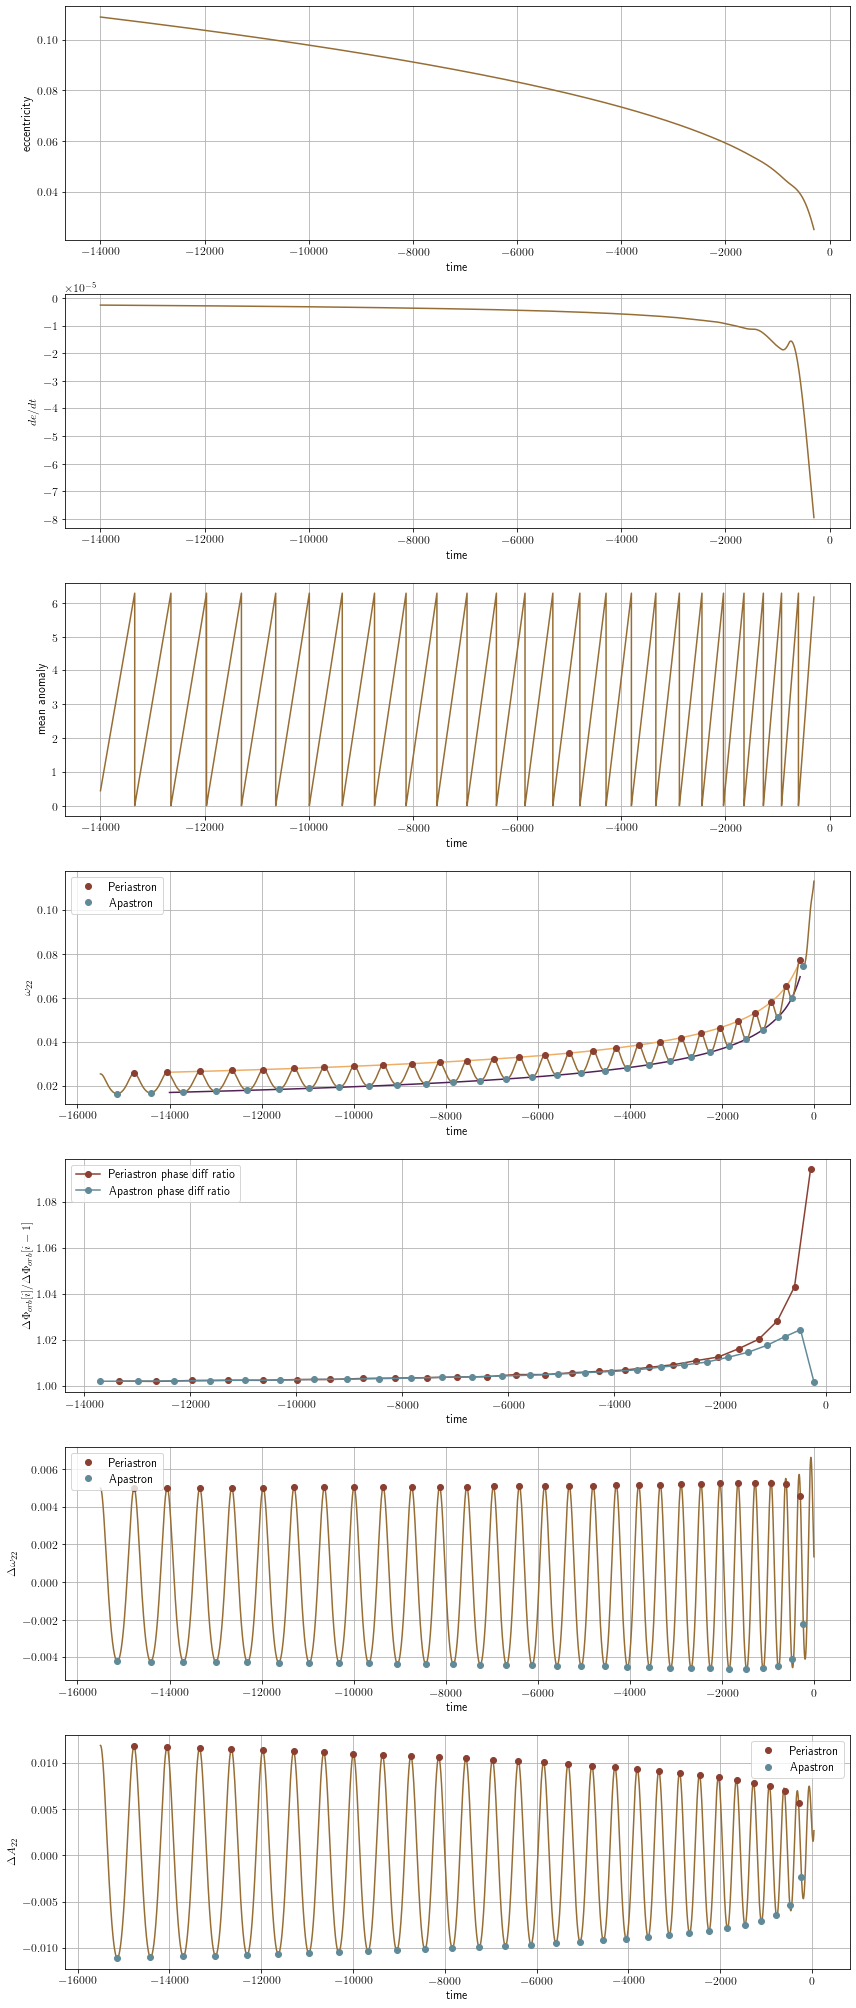

In [ ]:
eccMethod.make_diagnostic_plots()